Importing and setting up the Boston housing data that is built into Scikit-learn.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [6]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Checking the data with a quick visualization to make sure we understand what results would make sense later. Looking at a histogram and a scatter plot.

Text(0, 0.5, 'Number of Houses')

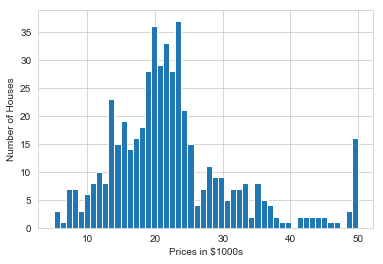

In [7]:
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of Houses')

Text(0.5, 0, 'Number of Rooms')

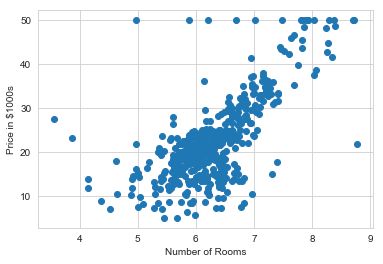

In [8]:
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price in $1000s')
plt.xlabel('Number of Rooms')

Creating a DataFrame to be used as the data for a linear regression:

In [9]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [10]:
boston_df['Price'] = boston.target  

In [11]:
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

This is the built in function in seaborn for linear regressions:

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


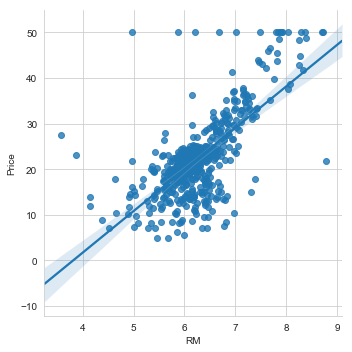

In [13]:
sns.lmplot('RM','Price',data=boston_df)

Now, using the Numpy Least Square Method for Univariate Linear Regression. The final product should be a recreation of the above plot that seaborn creates automatically:

In [30]:
X = boston_df.RM

In [31]:
X=np.vstack([boston_df.RM,np.ones(len(boston_df.RM))]).T

In [32]:
X.shape

(506, 2)

In [33]:
Y = boston_df.Price

In [34]:
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

Getting m and b values for the best fit line (following y=mx + b)

In [43]:
m , b = np.linalg.lstsq(X,Y,rcond=0)[0]

In [44]:
print(m,b)

9.102108981180315 -34.670620776438575


In [47]:
plt.plot(boston_df.RM,boston_df.Price,'o')

x= boston_df.RM

plt.plot(x, m*x + b,'r',label='Best Fit Line')

Finding the error in the best fit line:

In [57]:
result = np.linalg.lstsq(X,Y,rcond=0)

error_total = result[1]

root_mean_square_error = np.sqrt(error_total/len(X))

print ("The root mean square error was %.2f" %root_mean_square_error)

The root mean square error was 6.60


Using Scikit-Learn for a multivariate regression:

In [59]:
import sklearn
from sklearn.linear_model import LinearRegression

In [60]:
lreg = LinearRegression()

In [61]:
X_multi = boston_df.drop('Price',1)
Y_target = boston_df.Price

In [62]:
lreg.fit(X_multi,Y_target)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
print("The estimated intercept coefficient is %.2f" %lreg.intercept_)
print("The number of coefficients used was %d" %len(lreg.coef_))

The estimated intercept coefficient is 36.46
The number of coefficients used was 13


In [65]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)
coeff_df

Features  Coefficient Estimate
0      CRIM             -0.108011
1        ZN              0.046420
2     INDUS              0.020559
3      CHAS              2.686734
4       NOX            -17.766611
5        RM              3.809865
6       AGE              0.000692
7       DIS             -1.475567
8       RAD              0.306049
9       TAX             -0.012335
10  PTRATIO             -0.952747
11        B              0.009312
12    LSTAT             -0.524758
13    Price                   NaN

Training and Validation:

In [67]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [68]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


Predicting house prices with the training and testing sets:

In [69]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Finding mean square error:

In [74]:
print("Fit a model with X_train and then find the mean square error with Y_train: %.2f" %np.mean((Y_train-pred_train)**2))

print("Fit a model with X_train and then find mean square error using X_test and Y_test: %.2f" %np.mean((Y_test-pred_test)**2))

Fit a model with X_train and then find the mean square error with Y_train: 45.95
Fit a model with X_train and then find mean square error using X_test and Y_test: 36.94


Using a residual plot to tell if the linear regression was appropriate for our data or if we needed to model it differently: 

Text(0.5, 1.0, 'Residual Plots')

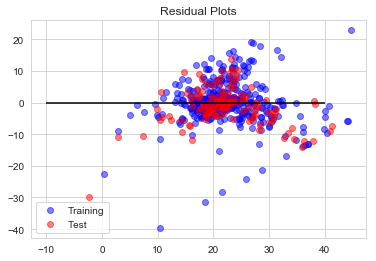

In [77]:
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

plt.hlines(y=0,xmin=-10,xmax=40)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

This residual plot does not seem to have any particular pattern and the points seem to be scattered on either side of the zero line, supporting the use of a linear regression. 